In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [113]:
import os
import configparser

config = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation(), allow_no_value=True)
config.read('config.ini')

df = pd.read_csv(os.path.join(config['PATHS']['apk_dir'], 'data.csv'))

In [149]:
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
X = df[['method_len','class_methods']]
#df[['str_len','str_val','method_len','class_fields','class_methods','classes_dex']]
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans

df

c:\Users\gschi\miniconda3\envs\onr-android-malware\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gschi\miniconda3\envs\onr-android-malware\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,str_len,str_val,method_len,class_fields,class_methods,classes_dex,malign,Cluster
0,0.0086,0.0095,0.0298,0.0279,0.0268,0.0396,0,0
1,0.0148,0.0187,0.0212,0.0199,0.0373,0.0361,0,0
2,0.0153,0.0163,0.0302,0.0234,0.0289,0.0437,0,0
3,0.0094,0.0099,0.0296,0.0332,0.0245,0.0373,0,0
4,0.0123,0.0113,0.0362,0.0303,0.0311,0.0398,0,0
...,...,...,...,...,...,...,...,...
192,0.0229,0.0206,0.0419,0.0194,0.0390,0.0411,1,0
193,0.0152,0.0097,0.0385,0.0312,0.0325,0.0370,1,0
194,0.0160,0.0142,0.0332,0.0313,0.0465,0.0378,1,0
195,0.0176,0.0195,0.0325,0.0372,0.0431,0.0395,1,0


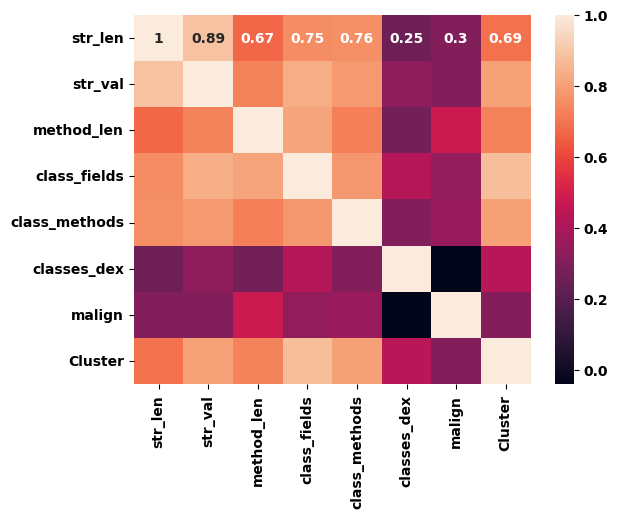

In [150]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(df.corr(), annot=True)
plt.show()

In [136]:
#X = df[['str_len','str_val','method_len','class_fields','class_methods','classes_dex']]
X = df[['method_len']]
y = df['malign']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification report:\n", report)

Accuracy: 0.55
Classification report:
               precision    recall  f1-score   support

           0       0.54      0.95      0.69        21
           1       0.67      0.11      0.18        19

    accuracy                           0.55        40
   macro avg       0.60      0.53      0.44        40
weighted avg       0.60      0.55      0.45        40

